In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 194kB 16.8MB/s 
     |████████████████████████████████| 1.1MB 16.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "to/current/dir"

/content/drive/My Drive/Fastai_faceCup/fastbook


In [8]:
# setting path for data-set
path = Path("guitar")
# getting the name of each image in the data-set
fns = get_image_files(path)
fns

(#288) [Path('guitar/acoustic/00000000.png'),Path('guitar/acoustic/00000002.jpg'),Path('guitar/acoustic/00000006.jpg'),Path('guitar/acoustic/00000001.jpg'),Path('guitar/acoustic/00000004.jpg'),Path('guitar/acoustic/00000008.jpg'),Path('guitar/acoustic/00000010.jpg'),Path('guitar/acoustic/00000012.jpg'),Path('guitar/acoustic/00000003.jpg'),Path('guitar/acoustic/00000007.jpg')...]

In [9]:
# checking if we have any corrupted image in our data-set
failed = verify_images(fns)
failed
# removing the corrupted image
failed.map(Path.unlink)

(#0) []

In [10]:
# creating dataBlock instance
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # creating blocks for image and labels
    get_items=get_image_files, #  get_image_files function takes a path, and returns a list of all of the images in that path
    splitter=RandomSplitter(valid_pct=.2, seed=42), # splitting data into validation and train set
    get_y=parent_label, # creating labels for each image
    item_tfms=Resize(128) # changing the size of each image with custom size
)

In [11]:
# a template for creating a DataLoaders and using our this function to load our data-set
dls = guitars.dataloaders(path)

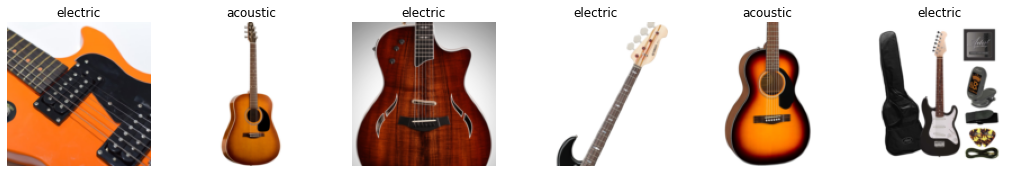

In [12]:
#showing some sample of train set
dls.train.show_batch(max_n=6, nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


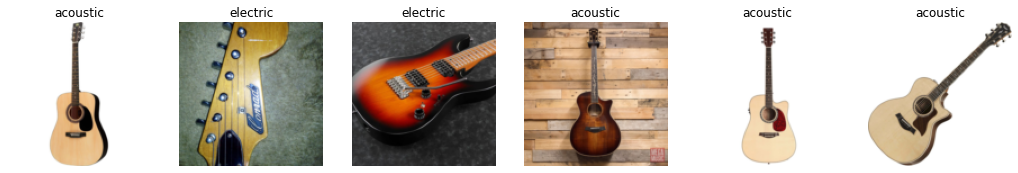

In [13]:
# showing some sample of validation set
dls.valid.show_batch(max_n=6, nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


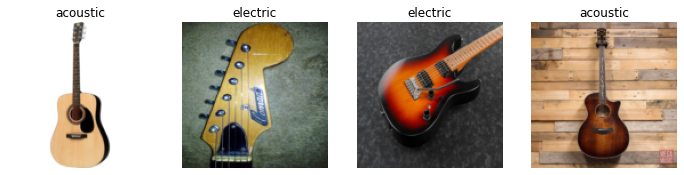

In [15]:
# squish the images to prevent losing data in Resize function
guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = guitars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


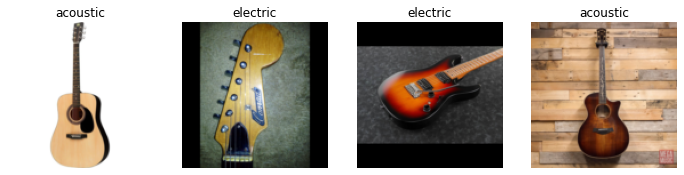

In [17]:
# like berfore  pad the images with zeros to prevent losing data in Resize function
guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = guitars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

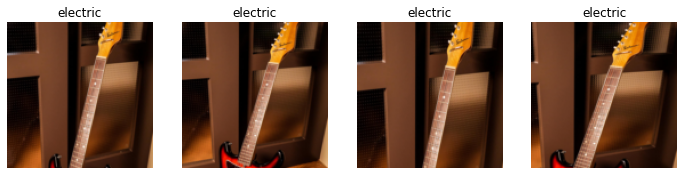

In [20]:
# using RandomResizedCrop we crop each part of image at a time while training,
# this way we don't lose much of data inspite of previous approaches
guitars = guitars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = guitars.dataloaders(path)
# choosing unique=True to have the same image repeated with different versions of this RandomResizedCrop transform
dls.train.show_batch(max_n=4, nrows=1, unique=True)

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter (note that we're not using `RandomResizedCrop` in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason)

for more information refer to this link:
[Image Augmentation for Deep Learning ](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/)

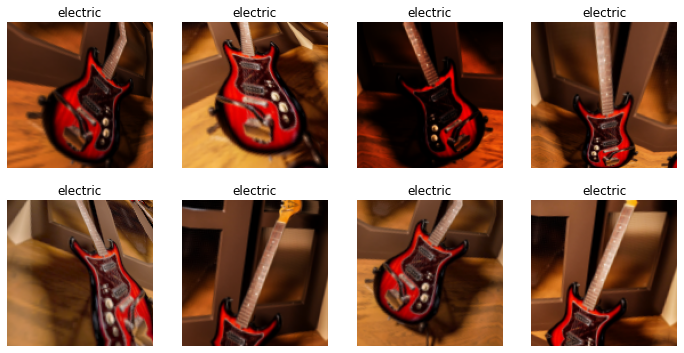

In [21]:
# perform image augmentation on our data
guitars = guitars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [25]:
# training the model
# here becuase we don't have enough images to train model we'll use RandomResizedCrop with an image size of 224 px,
# which is fairly standard for image classification, and default aug_transforms
guitars = guitars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = guitars.dataloaders(path)

In [26]:
# instantiate our learner with pretrained resnet model with 18 layers
learn = cnn_learner(dls, resnet18, metrics=error_rate)
# fine tuning the model
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.250367,0.403546,0.157895,00:18


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.541857,0.255333,0.122807,00:18
1,0.421480,0.219018,0.087719,00:18
2,0.336353,0.247303,0.070175,00:17
3,0.283093,0.231187,0.070175,00:17


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


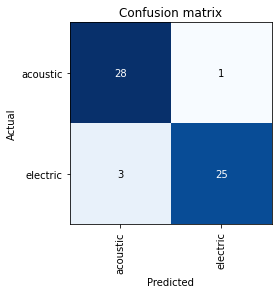

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

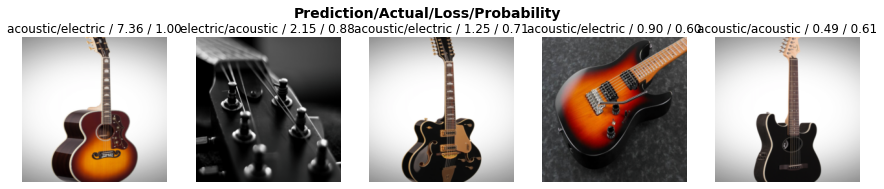

In [28]:
# mages with the highest loss in our dataset
interp.plot_top_losses(5, nrows=1)

In [29]:
learn.export(fname="guitar_model.pkl")

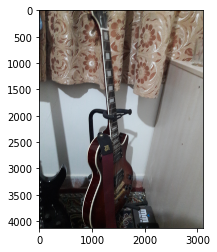

In [46]:
# checking 2 unseen samples that we wanna test our model with
import cv2
import matplotlib.pyplot as plt
im1 = cv2.imread('sample1.jpg')
im2 = cv2.imread('sample2.jpg')
im1_manip = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2_manip = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im1_manip);

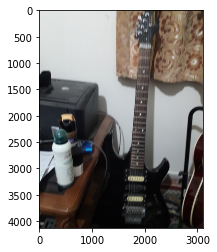

In [48]:
plt.imshow(im2_manip)

In [ ]:
plt.imshow(img1)

In [32]:
# testing our model with custom image
learn_inf = load_learner('guitar_model.pkl')
learn_inf.predict('sample1.jpg')

('electric', tensor(1), tensor([0.0015, 0.9985]))

In [35]:
learn_inf.predict('sample2.jpg')

('electric', tensor(1), tensor([8.3613e-04, 9.9916e-01]))